과대적합에 대한 규제화, 기계학습 허태영

---



# 1.Conic equation(2차원)

$\begin{matrix}MSE(\beta_1, \beta_2) &=& {1 \over n}\sum_{i=1}^n(y_i-\beta_1x_{1i}-\beta_2x_{2i})^2　　　　(i = 1,2,...,n) \\ \\ &=& {1 \over n}(\sum_{i=1}^ny_i^2-2\sum_{i=1}^ny_i(\beta_1x_{i1}+\beta_2x_{i2}) + \sum_{i=1}^ny_i(\beta_1x_{i1}+\beta_2x_{i2})^2) \\ \\
&=& {1 \over n}(\sum_{i=1}^ny_i^2-2(\sum_{i=1}^ny_ix_{i1})\beta_1-2(\sum_{i=1}^ny_ix_{i2})\beta_2+\sum_{i=1}^n(\beta_1^2x_{i1}^2+\beta_2^2x_{i2}^2+2\beta_1\beta_2x_{i1}x_{i2}))\\ \\ &=& {1\over n}((\sum_{i=1}^nx_{i1}^2)\beta_1^2+(\sum_{i=1}^nx_{i2}^2)\beta_2^2+(2\sum_{i=1}^nx_{i1}x_{i2})\beta_1\beta_2-2(\sum_{i=1}^ny_ix_{i1})\beta_1-2(\sum_{i=1}^ny_ix_{i2})\beta_2+\sum_{i=1}^ny_i^2) \\ \\ &=& A\beta_1^2+B\beta_1\beta_2+C\beta_2^2+D\beta_1+E\beta_2+F\end{matrix}$

$B^2-4AC < 0$　　　By Caushy-Schwartz inequality



> $\therefore$ 원뿔의 단면은 타원이다.


## Coordinate descent

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from matplotlib import animation
from IPython.display import HTML, Image


%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
def costfunction(X,y,theta):
    m = np.size(y)
    
    h = X @ theta
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J;


def coordinate_descent(theta,X,y,alpha = .03, num_iters=20):
    '''Coordinate gradient descent for linear regression'''
    m,n = X.shape
    J_history = []
    theta_0_hist, theta_1_hist = [], [] 
    
    
    for i in range(num_iters):
        
        for j in range(n):
            #Coordinate descent in vectorized form
            h = X @ theta 
            gradient =  (X[:,j] @ (h-y))
            theta[j] = theta[j] - alpha * gradient
            
            #Saving values for plots
            J_history.append(costfunction(X,y,theta))
            theta_0_hist.append(theta[0,0])
            theta_1_hist.append(theta[1,0])
                       
    return theta ,J_history, theta_0_hist, theta_1_hist

def coordinate_descent_norm(theta,X,y,alpha = .03, num_iters=100):
    '''Coordinate gradient descent for linear regression - for normalized data'''
    #Initialisation of useful values 
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X
    J_history = []
    theta_0_hist, theta_1_hist = [], [] #For plotting afterwards
    
    
    for i in range(num_iters):
        
        for j in range(n):
            #Coordinate descent in vectorized form
            h = (X[:,0:j] @ theta[0:j]) + (X[:,j+1:] @ theta[j+1:])
            theta[j] =  (X[:,j] @ (y - h))
            
            #Saving values for plots
            J_history.append(costfunction(X,y,theta))
            theta_0_hist.append(theta[0,0])
            theta_1_hist.append(theta[1,0])
                       
    return theta ,J_history, theta_0_hist, theta_1_hist

No handles with labels found to put in legend.
No handles with labels found to put in legend.


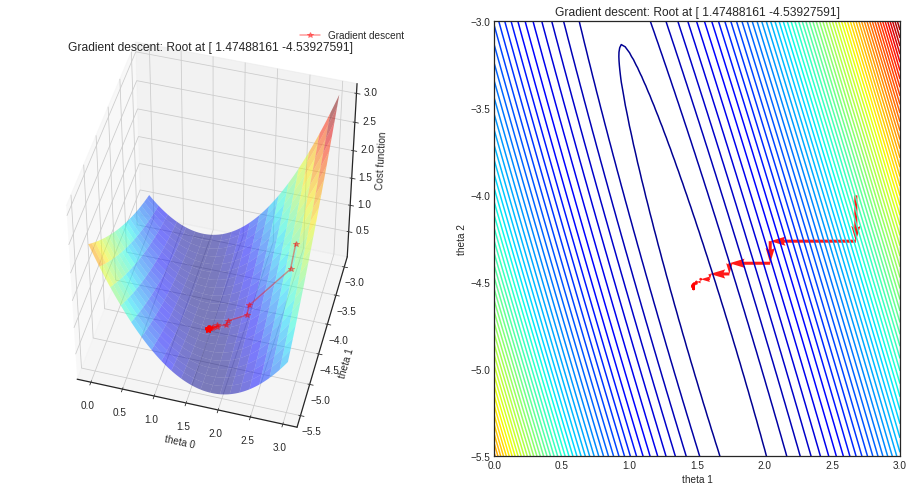

In [ ]:
#Creating the dataset (as previously)
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)
y_noise = y_noise - y_noise.mean()
X = np.vstack((2*x,x**2)).T
initial_theta = np.array([4,-4.]).reshape(-1,1)

T0, T1 = np.meshgrid(np.linspace(0,3,100),np.linspace(-5.5,-3,100))

zs = np.array(  [costfunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
 
Z = zs.reshape(T0.shape)

theta_result_c,J_history_c, theta_0_c, theta_1_c = coordinate_descent(initial_theta,X,y_noise, alpha = .009) 

anglesx = np.array(theta_0_c)[1:] - np.array(theta_0_c)[:-1]
anglesy = np.array(theta_1_c)[1:] - np.array(theta_1_c)[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0_c,theta_1_c,J_history_c, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost function')
ax.set_title('Gradient descent: Root at {}'.format(theta_result_c.ravel()))
ax.view_init(45, -75)
ax.legend()


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_0_c[:-1], theta_1_c[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')
ax.set_title('Gradient descent: Root at {}'.format(theta_result_c.ravel()))
ax.legend()

plt.legend()
plt.show()

In [ ]:
#Plot the contour
fig1, ax1 = plt.subplots(figsize = (7,7))
ax1.contour(T0, T1, Z, 100, cmap = 'jet')

#theta_result_c,J_history_c, theta_0_c, theta_1_c

# Create animation
line, = ax1.plot([], [], 'r', label = 'Gradient descent', lw = 1.5)
point, = ax1.plot([], [], '*', color = 'red', markersize = 4)
value_display = ax1.text(0.02, 0.02, '', transform=ax1.transAxes)

def init_1():
    line.set_data([], [])
    point.set_data([], [])
    value_display.set_text('')

    return line, point, value_display

def animate_1(i):
    # Animate line
    line.set_data(theta_0_c[:i], theta_1_c[:i])
    
    # Animate points
    point.set_data(theta_0_c[i], theta_1_c[i])

    # Animate value display
    value_display.set_text('Min = ' + str(J_history_c[i]))

    return line, point, value_display

ax1.legend(loc = 1)

anim1 = animation.FuncAnimation(fig1, animate_1, init_func=init_1,
                               frames=len(theta_0_c), interval=100, 
                               repeat_delay=60, blit=True)
#plt.show()
HTML(anim1.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

# 2.Example



> R코드 1page~2page에 있는 Example 1을 python으로 실행한 결과



- 패키지 불러오고 데이터 만들기

In [ ]:
import random
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import Ridge,Lasso,ElasticNet,lasso_path,enet_path
import multiprocessing

random.seed(19875)

n = 1000; p = 5000
real_p = 15

X = np.random.normal(0,1,n*p).reshape(n,p)
y= X[:,0:real_p].sum(axis=1)+ np.random.normal(0,1,n)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.33)

## Lasso 

No handles with labels found to put in legend.


(4.430147791550827e-05,
 2.3853450474135047,
 -0.15721190853918254,
 1.1205667242724542)

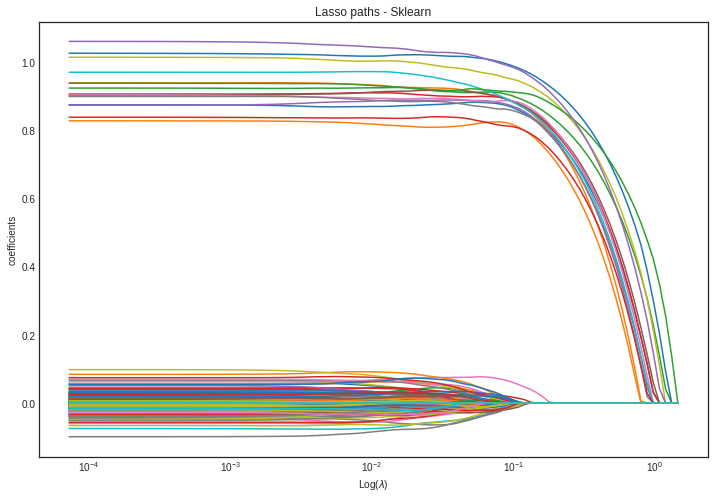

In [ ]:
eps = 5e-5

alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, eps=eps)

plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(alphas_lasso, coefs_lasso[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

In [ ]:
lasso_param = [{'alpha' : alphas_lasso}]

In [ ]:
lasso_gs = GridSearchCV(
    estimator  = Lasso(),
    param_grid=lasso_param,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True,
    scoring = 'neg_mean_squared_error'
)

In [ ]:
lasso_gs.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=Lasso(), n_jobs=2,
             param_grid=[{'alpha': array([1.45378342e+00, 1.31539129e+00, 1.19017333e+00, 1.07687543e+00,
       9.74362858e-01, 8.81608915e-01, 7.97684633e-01, 7.21749477e-01,
       6.53042928e-01, 5.90876861e-01, 5.34628659e-01, 4.83734974e-01,
       4.37686086e-01, 3.96020797e-01, 3.58321812e-01, 3.24211562e-01,
       2.93348419e-01, 2.65423275e-01, 2.40156451e-...
       4.86317520e-04, 4.40022788e-04, 3.98135058e-04, 3.60234807e-04,
       3.25942450e-04, 2.94914536e-04, 2.66840307e-04, 2.41438589e-04,
       2.18454973e-04, 1.97659271e-04, 1.78843204e-04, 1.61818322e-04,
       1.46414115e-04, 1.32476303e-04, 1.19865293e-04, 1.08454782e-04,
       9.81304876e-05, 8.87890091e-05, 8.03367876e-05, 7.26891708e-05])}],
             scoring='neg_mean_squared_error', verbose=True)

In [ ]:
lasso_gs.best_estimator_

Lasso(alpha=0.0976093744508225)

In [ ]:
lasso_model = lasso_gs.best_estimator_
lasso_model.fit(X_train,y_train)
predict = lasso_model.predict(X_test)

In [ ]:
## MSE
np.sum((y_test-predict)**2)/330

1.1944887546989518

## Ridge

In [ ]:
n_alphas = 200
alphas_Ridge = np.logspace(1, 10, n_alphas)

In [ ]:
coefs = []
for a in alphas_Ridge:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

No handles with labels found to put in legend.


(28183829312.644493,
 3.548133892335755,
 -0.07167188982697396,
 0.18735565942698718)

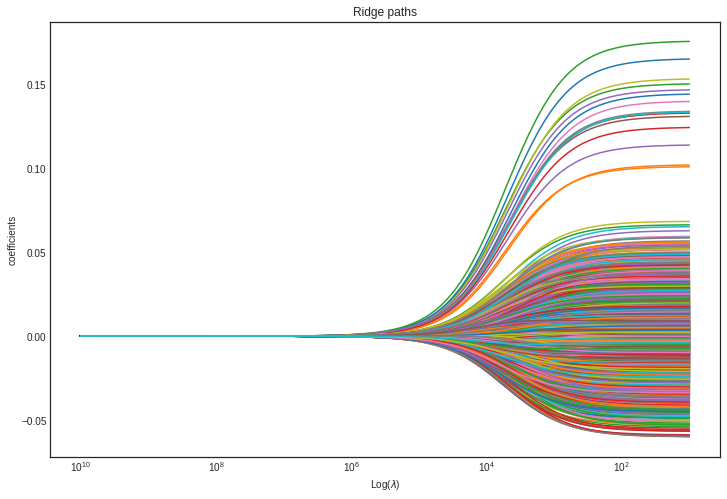

In [ ]:
plt.figure(figsize = (12,8))

ax = plt.gca()

ax.plot(alphas_Ridge, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Ridge paths')
plt.legend()
plt.axis('tight')

In [ ]:
ridge_param = [{'alpha' : alphas_Ridge}]

In [ ]:
ridge_gs = GridSearchCV(
    estimator  = Ridge(),
    param_grid=ridge_param,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True,
    scoring = 'neg_mean_squared_error'
)

In [ ]:
ridge_gs.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(estimator=Ridge(), n_jobs=2,
             param_grid=[{'alpha': array([1.00000000e+01, 1.10975250e+01, 1.23155060e+01, 1.36671636e+01,
       1.51671689e+01, 1.68318035e+01, 1.86791360e+01, 2.07292178e+01,
       2.30043012e+01, 2.55290807e+01, 2.83309610e+01, 3.14403547e+01,
       3.48910121e+01, 3.87203878e+01, 4.29700470e+01, 4.76861170e+01,
       5.29197874e+01, 5.87278661e+01, 6.51733960e+...
       1.38262217e+09, 1.53436841e+09, 1.70276917e+09, 1.88965234e+09,
       2.09704640e+09, 2.32720248e+09, 2.58261876e+09, 2.86606762e+09,
       3.18062569e+09, 3.52970730e+09, 3.91710149e+09, 4.34701316e+09,
       4.82410870e+09, 5.35356668e+09, 5.94113398e+09, 6.59318827e+09,
       7.31680714e+09, 8.11984499e+09, 9.01101825e+09, 1.00000000e+10])}],
             scoring='neg_mean_squared_error', verbose=True)

In [ ]:
ridge_model = ridge_gs.best_estimator_
ridge_model.fit(X_train,y_train)
predict = ridge_model.predict(X_test)

In [ ]:
## MSE
np.sum((y_test-predict)**2)/330

13.689046577932189

## elastic net

No handles with labels found to put in legend.


(8.860295583101655e-05,
 4.7706900948270095,
 -0.15271365316947128,
 1.03232409275127)

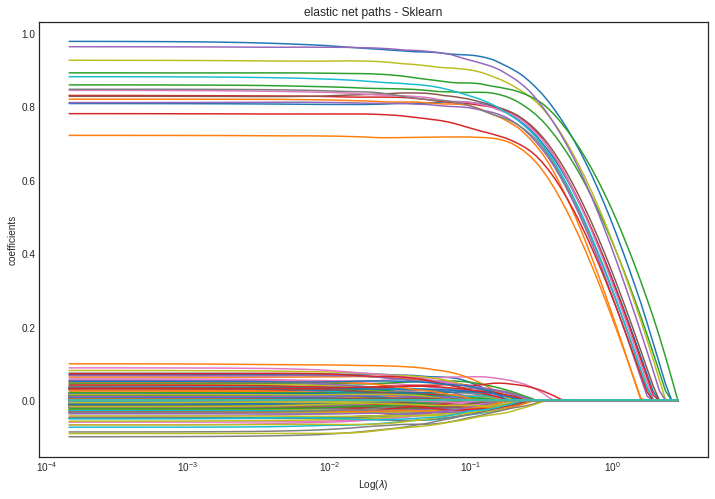

In [ ]:
eps = 5e-5

alphas_enet, coefs_enet, _ = enet_path(X_train, y_train, eps=eps)

plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(alphas_enet, coefs_enet[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('elastic net paths - Sklearn')
plt.legend()
plt.axis('tight')

In [ ]:
enet_param = [{'alpha' : alphas_enet}]

In [ ]:
enet_gs = GridSearchCV(
    estimator  = ElasticNet(),
    param_grid=enet_param,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True,
    scoring = 'neg_mean_squared_error'
)

In [ ]:
enet_gs.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=ElasticNet(), n_jobs=2,
             param_grid=[{'alpha': array([2.90756683e+00, 2.63078259e+00, 2.38034667e+00, 2.15375086e+00,
       1.94872572e+00, 1.76321783e+00, 1.59536927e+00, 1.44349895e+00,
       1.30608586e+00, 1.18175372e+00, 1.06925732e+00, 9.67469949e-01,
       8.75372173e-01, 7.92041594e-01, 7.16643625e-01, 6.48423124e-01,
       5.86696837e-01, 5.30846550e-01, 4.80312...
       9.72635040e-04, 8.80045576e-04, 7.96270115e-04, 7.20469614e-04,
       6.51884900e-04, 5.89829071e-04, 5.33680613e-04, 4.82877177e-04,
       4.36909947e-04, 3.95318542e-04, 3.57686408e-04, 3.23636644e-04,
       2.92828230e-04, 2.64952606e-04, 2.39730586e-04, 2.16909563e-04,
       1.96260975e-04, 1.77578018e-04, 1.60673575e-04, 1.45378342e-04])}],
             scoring='neg_mean_squared_error', verbose=True)

In [ ]:
enet_model = enet_gs.best_estimator_
enet_model.fit(X_train,y_train)
predict = enet_model.predict(X_test)

In [ ]:
## MSE
np.sum((y_test-predict)**2)/330

1.6901360587022942

# 3.boston 집값 예측(과제 ~5/17 오전 10시전까지)

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()
X = boston.data
y = boston.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.